In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Overview

In [4]:
df_identity=pd.read_csv('C:/Users/Administrator/Desktop/fraud-detection/data/raw/train_identity.csv')

In [5]:
print(f"Shape: {df_identity.shape}")

Shape: (144233, 41)


In [6]:
df_transaction = pd.read_csv(   
    'C:/Users/Administrator/Desktop/fraud-detection/data/raw/train_transaction.csv',    
    nrows=100000)

print(f"Shape: {df_transaction.shape}")

Shape: (100000, 394)


In [7]:
df_identity.head()


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [8]:
df_identity.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [9]:
df_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [10]:
df_identity.isnull().sum()

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64

In [11]:
df_identity.describe()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,1.442330e+05,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.236329e+06,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.788496e+05,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987004e+06,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.077142e+06,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.198818e+06,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.392923e+06,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577534e+06,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [12]:
df_transaction.head()   

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 300.6+ MB


In [14]:
df_transaction.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [382]:
print(df_transaction.columns.tolist())

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V

## FRAUD ANALYSIS

### Target Variable: Fraud Rate In Data

In [15]:
df_transaction["isFraud"].unique()

array([0, 1])

In [16]:
len(df_transaction["isFraud"])

100000

In [17]:
df_transaction["isFraud"].isnull().sum()

np.int64(0)

In [18]:
df_transaction["isFraud"].value_counts()

isFraud
0    97439
1     2561
Name: count, dtype: int64

In [19]:
df_transaction["isFraud"].value_counts(normalize=True)*100

isFraud
0    97.439
1     2.561
Name: proportion, dtype: float64

In [20]:
fraud_transaction = df_transaction["isFraud"].value_counts()

In [81]:
not_fraud = df_transaction["isFraud"].value_counts().loc[0]
is_fraud = df_transaction["isFraud"].value_counts().loc[1]

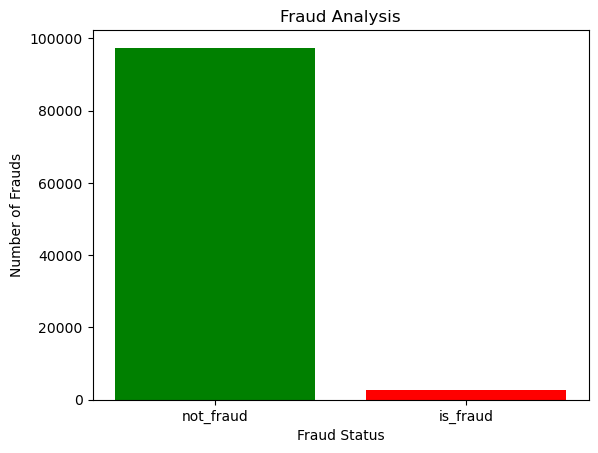

<Figure size 800x500 with 0 Axes>

In [82]:
plt.bar(['not_fraud', 'is_fraud'], [not_fraud, is_fraud], color=['green', 'red'])
plt.title('Fraud Analysis')
plt.xlabel('Fraud Status')
plt.ylabel('Number of Frauds')
plt.figure(figsize=(8, 5))
plt.show()

## Transaction Amount Analysis

In [23]:
df_transaction.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [24]:
df_transaction["TransactionAmt"].describe()

count    100000.000000
mean        130.743351
std         206.024684
min           0.292000
25%          45.000000
50%          75.000000
75%         135.950000
max        4829.950000
Name: TransactionAmt, dtype: float64

In [25]:
df_transaction.groupby("isFraud")["TransactionAmt"].agg([min, "mean", "median", max])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5252\1139025873.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df_transaction.groupby("isFraud")["TransactionAmt"].agg([min, "mean", "median", max])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5252\1139025873.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_transaction.groupby("isFraud")["TransactionAmt"].agg([min, "mean", "median", max])


,min,mean,median,max
isFraud,,,,
0,1.000,130.664052,75.000,4829.95
1,0.292,133.760444,78.788,3081.97


In [26]:
# Separate the data
normal_amt = df_transaction[df_transaction['isFraud'] == 0]['TransactionAmt']
fraud_amt = df_transaction[df_transaction['isFraud'] == 1]['TransactionAmt']


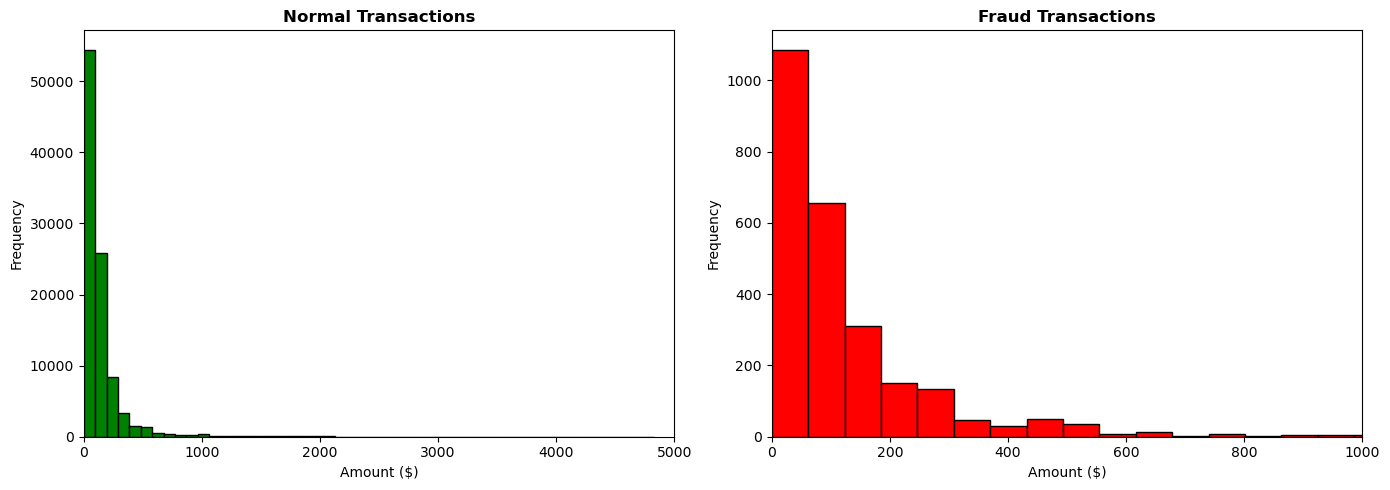

In [27]:

# Create two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Normal transactions
axes[0].hist(normal_amt, bins=50, color='green', edgecolor='black')
axes[0].set_title('Normal Transactions', fontweight='bold')
axes[0].set_xlabel('Amount ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, 5000)


# Fraud transactions
axes[1].hist(fraud_amt, bins=50, color='red', edgecolor='black')
axes[1].set_title('Fraud Transactions', fontweight='bold')
axes[1].set_xlabel('Amount ($)')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(0, 1000)

plt.tight_layout()
plt.show()


In [28]:
df_transaction["transaction_range"] = pd.cut(
    df_transaction["TransactionAmt"], 
        bins=[0, 50, 100, 500, 1000, 5000], 
            labels=[ 'Low-value($0-$50:)', 'Medium-value($50-$100)', 'High-value($100-$500)', 'Very-High-value($500-$1000)', 'Ultra-High-value($1000+)'])

In [29]:
df_transaction["transaction_range"].value_counts()

transaction_range
Low-value($0-$50:)             36301
High-value($100-$500)          31840
Medium-value($50-$100)         28464
Very-High-value($500-$1000)     2529
Ultra-High-value($1000+)         866
Name: count, dtype: int64

In [30]:
df_transaction.groupby("transaction_range")["isFraud"].value_counts()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5252\1842828291.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_transaction.groupby("transaction_range")["isFraud"].value_counts()


transaction_range            isFraud
Low-value($0-$50:)           0          35442
                             1            859
Medium-value($50-$100)       0          27754
                             1            710
High-value($100-$500)        0          30919
                             1            921
Very-High-value($500-$1000)  0           2471
                             1             58
Ultra-High-value($1000+)     0            853
                             1             13
Name: count, dtype: int64

In [88]:
df_transaction.groupby("transaction_range")["isFraud"].value_counts().loc[:,1]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5252\944875349.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_transaction.groupby("transaction_range")["isFraud"].value_counts().loc[:,1]


transaction_range
Low-value($0-$50:)             859
Medium-value($50-$100)         710
High-value($100-$500)          921
Very-High-value($500-$1000)     58
Ultra-High-value($1000+)        13
Name: count, dtype: int64

In [87]:
df_transaction.groupby("transaction_range")["isFraud"].value_counts(normalize=True)*100

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5252\643023573.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_transaction.groupby("transaction_range")["isFraud"].value_counts(normalize=True)*100


transaction_range            isFraud
Low-value($0-$50:)           0          97.633674
                             1           2.366326
Medium-value($50-$100)       0          97.505621
                             1           2.494379
High-value($100-$500)        0          97.107412
                             1           2.892588
Very-High-value($500-$1000)  0          97.706603
                             1           2.293397
Ultra-High-value($1000+)     0          98.498845
                             1           1.501155
Name: proportion, dtype: float64

In [97]:
df_transaction.groupby("transaction_range")["isFraud"].value_counts(normalize=True).loc[:,1]*100

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5252\2633708499.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_transaction.groupby("transaction_range")["isFraud"].value_counts(normalize=True).loc[:,1]*100


transaction_range
Low-value($0-$50:)             2.366326
Medium-value($50-$100)         2.494379
High-value($100-$500)          2.892588
Very-High-value($500-$1000)    2.293397
Ultra-High-value($1000+)       1.501155
Name: proportion, dtype: float64

In [98]:
fraud_transaction = df_transaction.groupby("transaction_range")["isFraud"].value_counts(normalize=True).loc[:,1]*100

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5252\2392086768.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_transaction = df_transaction.groupby("transaction_range")["isFraud"].value_counts(normalize=True).loc[:,1]*100


In [99]:
fraud_transaction = fraud_transaction.reset_index(name='Percentage')


In [100]:
fraud_transaction

,transaction_range,Percentage
0,Low-value($0-$50:),2.366326
1,Medium-value($50-$100),2.494379
2,High-value($100-$500),2.892588
3,Very-High-value($500-$1000),2.293397
4,Ultra-High-value($1000+),1.501155


In [101]:
fraud_only = fraud_transaction

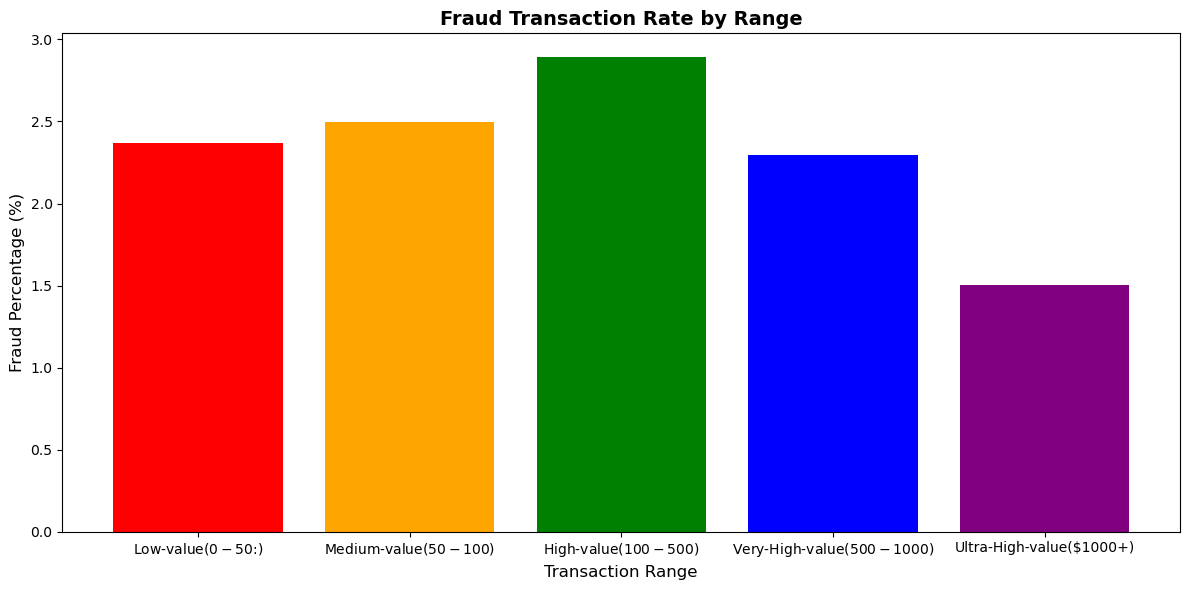

In [102]:
plt.figure(figsize=(12,6))
colors = ['red', 'orange', 'green', 'blue', 'purple']

# ✅ Store the bars in a variable
bars = plt.bar(fraud_only['transaction_range'], fraud_only['Percentage'], color=colors)
plt.title('Fraud Transaction Rate by Range', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Range', fontsize=12)
plt.ylabel('Fraud Percentage (%)', fontsize=12)

plt.tight_layout()
plt.show()


## Time Analysis Plan

In [37]:
df_transaction["TransactionDT"].dtype

dtype('int64')

In [38]:
df_transaction["TransactionDT"]

0          86400
1          86401
2          86469
3          86499
4          86506
          ...   
99995    2005989
99996    2006074
99997    2006135
99998    2006177
99999    2006364
Name: TransactionDT, Length: 100000, dtype: int64

### DATE TIME CONVERSION FOR FRAUD RATE TEMPORAL ANALYSIS

In [39]:
import pandas as pd

start_date = pd.Timestamp('2017-12-01')

df_transaction["datetime"] = start_date + pd.to_timedelta(df_transaction["TransactionDT"], unit='s')


In [40]:
df_transaction["datetime"].dtype

dtype('<M8[ns]')

In [43]:
df_transaction["hour"] = df_transaction["datetime"].dt.hour

In [44]:
df_transaction["hour"]

0        0
1        0
2        0
3        0
4        0
        ..
99995    5
99996    5
99997    5
99998    5
99999    5
Name: hour, Length: 100000, dtype: int32

In [45]:
df_transaction["day_of_week"] = df_transaction["datetime"].dt.dayofweek


In [46]:
df_transaction["day_of_week"] 

0        5
1        5
2        5
3        5
4        5
        ..
99995    6
99996    6
99997    6
99998    6
99999    6
Name: day_of_week, Length: 100000, dtype: int32

In [47]:
df_transaction["is_weekend"] = df_transaction["day_of_week"].isin([5, 6])


In [48]:
df_transaction["is_weekend"]

0        True
1        True
2        True
3        True
4        True
         ... 
99995    True
99996    True
99997    True
99998    True
99999    True
Name: is_weekend, Length: 100000, dtype: bool

In [49]:
df_transaction["is_weekend"].value_counts()

is_weekend
False    65643
True     34357
Name: count, dtype: int64

In [50]:
df_transaction["is_weekend"].value_counts(normalize=True)*100

is_weekend
False    65.643
True     34.357
Name: proportion, dtype: float64

## FRAUD RATE BY HOUR OF DAY ANALYSIS

In [ ]:
df_transaction["hour"].value_counts().sort_index()

hour
0     6448
1     5737
2     4902
3     3797
4     2892
5     1909
6     1119
7      647
8      398
9      343
10     417
11     773
12    1588
13    2937
14    4560
15    5635
16    6886
17    7123
18    7228
19    7280
20    6964
21    7064
22    6737
23    6616
Name: count, dtype: int64

In [103]:
transcation_hr = df_transaction["hour"].value_counts().sort_index()

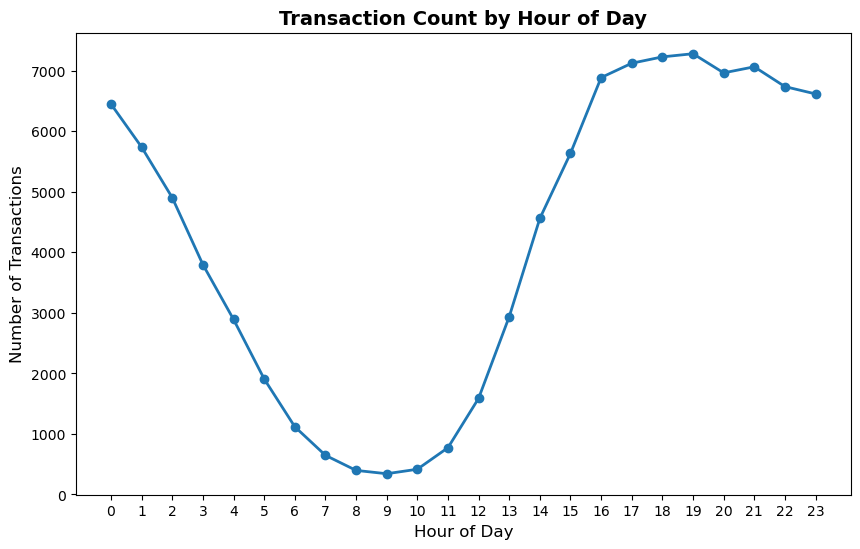

In [106]:
plt.figure(figsize=(10,6))
plt.plot(transcation_hr.index, transcation_hr.values, marker='o', linewidth=2, markersize=6)
plt.title('Transaction Count by Hour of Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)  
plt.ylabel('Number of Transactions', fontsize=12)   
plt.xticks(range(0, 24)) 
plt.show()

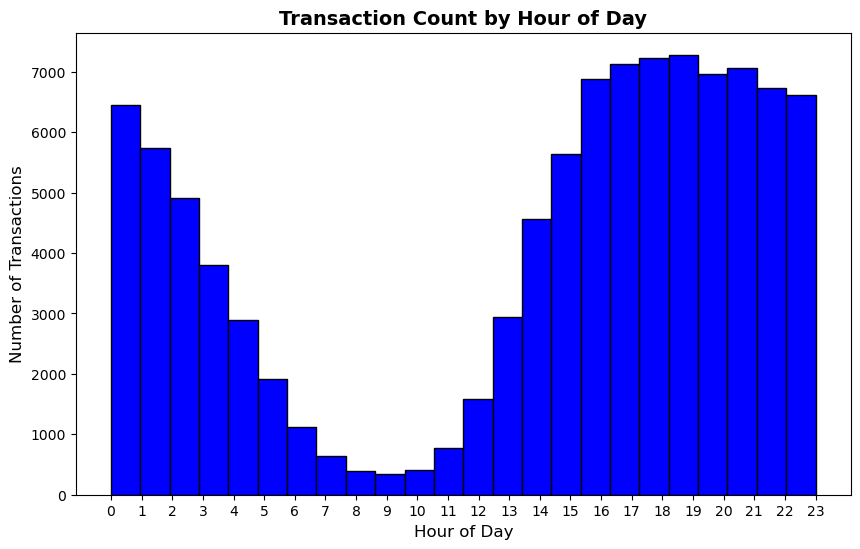

In [61]:
plt.figure(figsize=(10,6))
plt.hist(df_transaction["hour"], bins=24, color='blue', edgecolor='black')
plt.title('Transaction Count by Hour of Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)  
plt.ylabel('Number of Transactions', fontsize=12)   
plt.xticks(range(0, 24)) 
plt.show()

In [108]:
df_transaction.groupby('hour')['isFraud'].value_counts(normalize= True).loc[:, 1] * 100

hour
0     2.434864
1     2.632038
2     2.141983
3     2.923361
4     3.734440
5     4.609743
6     4.557641
7     3.245750
8     5.276382
9     5.247813
10    3.117506
11    2.716688
12    2.707809
13    1.293837
14    1.973684
15    1.739130
16    2.134766
17    2.204127
18    2.794687
19    2.472527
20    2.240092
21    2.802945
22    2.746029
23    3.053204
Name: proportion, dtype: float64

In [73]:
fraud_by_hour = df_transaction.groupby('hour')['isFraud'].mean() * 100
print(fraud_by_hour)

hour
0     2.434864
1     2.632038
2     2.141983
3     2.923361
4     3.734440
5     4.609743
6     4.557641
7     3.245750
8     5.276382
9     5.247813
10    3.117506
11    2.716688
12    2.707809
13    1.293837
14    1.973684
15    1.739130
16    2.134766
17    2.204127
18    2.794687
19    2.472527
20    2.240092
21    2.802945
22    2.746029
23    3.053204
Name: isFraud, dtype: float64


In [74]:
# Calculate fraud rate by hour
fraud_by_hour_rate = df_transaction.groupby('hour')['isFraud'].agg(['sum','count','mean'])
fraud_by_hour_rate.columns = ['Fraud_Count','Total','Fraud_Rate']
fraud_by_hour_rate['Fraud_Rate'] = fraud_by_hour_rate['Fraud_Rate'] * 100

print(fraud_by_hour_rate)

      Fraud_Count  Total  Fraud_Rate
hour                                
0             157   6448    2.434864
1             151   5737    2.632038
2             105   4902    2.141983
3             111   3797    2.923361
4             108   2892    3.734440
5              88   1909    4.609743
6              51   1119    4.557641
7              21    647    3.245750
8              21    398    5.276382
9              18    343    5.247813
10             13    417    3.117506
11             21    773    2.716688
12             43   1588    2.707809
13             38   2937    1.293837
14             90   4560    1.973684
15             98   5635    1.739130
16            147   6886    2.134766
17            157   7123    2.204127
18            202   7228    2.794687
19            180   7280    2.472527
20            156   6964    2.240092
21            198   7064    2.802945
22            185   6737    2.746029
23            202   6616    3.053204


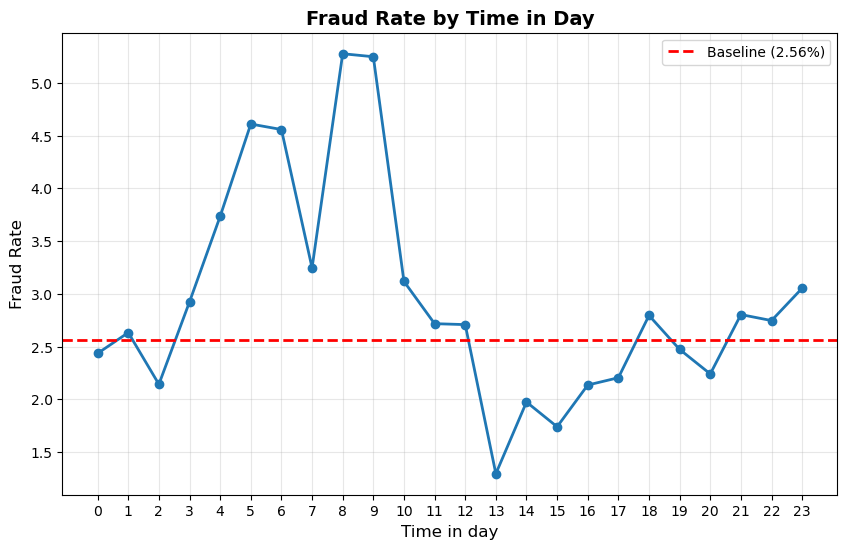

In [78]:
# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot the line
plt.plot(fraud_by_hour.index, fraud_by_hour.values, marker='o', linewidth=2, markersize=6)

# Add horizontal line for baseline fraud rate
plt.axhline(y=2.56, color='red', linestyle='--', linewidth=2, label='Baseline (2.56%)')


# Labels and title
plt.xlabel('Time in day', fontsize=12)
plt.ylabel('Fraud Rate', fontsize=12)
plt.title('Fraud Rate by Time in Day', fontsize=14, fontweight='bold')
plt.xticks(range(0, 24))

# Show legend
plt.legend()

# Show grid for easier reading
plt.grid(True, alpha=0.3)

# Display plot
plt.tight_layout
plt.show()

In [110]:
df_transaction.groupby('hour')['isFraud'].count()

hour
0     6448
1     5737
2     4902
3     3797
4     2892
5     1909
6     1119
7      647
8      398
9      343
10     417
11     773
12    1588
13    2937
14    4560
15    5635
16    6886
17    7123
18    7228
19    7280
20    6964
21    7064
22    6737
23    6616
Name: isFraud, dtype: int64

In [111]:
# How many transactions >$100 happen at hour 6?
df_transaction[(df_transaction['hour'] == 6) & 
               (df_transaction['TransactionAmt'] > 100)].shape[0]

361

In [113]:
df_transaction[(df_transaction['hour'] == 6) & 
               (df_transaction['TransactionAmt'] <= 100)].shape[0]

758

## DAY FRAUD RATE BY DAY OF WEEK

In [ ]:
df_transaction["day_of_week"] 

In [116]:
fraud_by_day = df_transaction.groupby("day_of_week")["isFraud"].agg(['sum', 'count', 'mean'])
fraud_by_day.columns = ['Fraud_Count', 'Total_Transactions', 'Fraud_Rate']
fraud_by_day["Fraud_Rate"] = fraud_by_day["Fraud_Rate"] * 100

In [117]:
fraud_by_day

,Fraud_Count,Total_Transactions,Fraud_Rate
day_of_week,,,
0,308,10491,2.935850
1,399,13940,2.862267
2,329,13654,2.409550
3,316,13649,2.315188
4,378,13909,2.717665
5,495,21007,2.356357
6,336,13350,2.516854


In [118]:
fraud_transaction_day = df_transaction.groupby("day_of_week")["isFraud"].value_counts(normalize=True).loc[:,1]*100

In [119]:
fraud_transaction_day 

day_of_week
0    2.935850
1    2.862267
2    2.409550
3    2.315188
4    2.717665
5    2.356357
6    2.516854
Name: proportion, dtype: float64

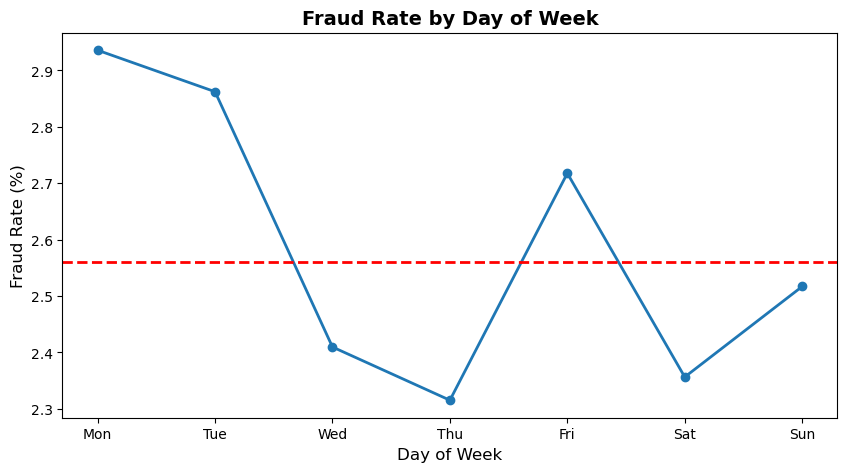

In [121]:
plt.figure(figsize=(10,5))
plt.plot(fraud_transaction_day.index, fraud_transaction_day.values, marker='o', linewidth=2, markersize=6)
plt.axhline(y=2.56, color='red', linestyle='--', linewidth=2, label='Baseline (2.56%)')
plt.title('Fraud Rate by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)  
plt.ylabel('Fraud Rate (%)', fontsize=12)   
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

## RISK SCORE BY TIME OF DAY ADD DAY OF WEEK

**Creating new 3 new temporal feature based on hour and day fraud rate on my df_transactions dataframe**

Since my hourly and daily fraud rates are in separate summary tables (Series/DataFrames), I’ll use .map() to connect each transaction’s hour/day to its corresponding fraud rate — and create new columns for them in my main dataset.

In [123]:
# Map hour to fraud rate (your actual data)
hour_risk_map = fraud_by_hour.to_dict()

# Map day to fraud rate (your actual data)
day_risk_map = fraud_transaction_day.to_dict()

# Create the numeric features
df_transaction['hour_risk_score'] = df_transaction['hour'].map(hour_risk_map)
df_transaction['day_risk_score'] = df_transaction['day_of_week'].map(day_risk_map)

# Combined temporal risk score (average)
df_transaction['temporal_risk_score'] = (df_transaction['hour_risk_score'] + 
                                          df_transaction['day_risk_score']) / 2

In [126]:
print(df_transaction[['hour', 'day_of_week', 'hour_risk_score', 
                      'day_risk_score', 'temporal_risk_score']].head(10))

   hour  day_of_week  hour_risk_score  day_risk_score  temporal_risk_score
0     0            5         2.434864        2.356357              2.39561
1     0            5         2.434864        2.356357              2.39561
2     0            5         2.434864        2.356357              2.39561
3     0            5         2.434864        2.356357              2.39561
4     0            5         2.434864        2.356357              2.39561
5     0            5         2.434864        2.356357              2.39561
6     0            5         2.434864        2.356357              2.39561
7     0            5         2.434864        2.356357              2.39561
8     0            5         2.434864        2.356357              2.39561
9     0            5         2.434864        2.356357              2.39561


### Risk Level

In [154]:
# Create categorical risk levels
def categorize_temporal_risk(score):
    if score > 4.0:
        return 'very_high'
    elif score > 3.0:
        return 'high'
    elif score > 2.3:
        return 'medium'
    elif score > 2.0:
        return 'low'
    else:
        return 'very_low'

df_transaction['temporal_risk_category'] = df_transaction['temporal_risk_score'].apply(categorize_temporal_risk)

In [168]:
print(df_transaction['temporal_risk_category'].value_counts().sort_values(ascending=False))

temporal_risk_category
medium       72354
low          18945
high          6681
very_low      1852
very_high      168
Name: count, dtype: int64


In [171]:
df_transaction['temporal_risk_category'].value_counts().sort_values(ascending=False)

temporal_risk_category
medium       72354
low          18945
high          6681
very_low      1852
very_high      168
Name: count, dtype: int64

In [174]:
df_transaction.groupby('temporal_risk_category')['isFraud'].value_counts(normalize=True).loc[:,1].sort_values(ascending=False)*100

temporal_risk_category
very_high    4.761905
high         4.325700
medium       2.591425
low          1.926630
very_low     1.295896
Name: proportion, dtype: float64

In [167]:
# Check fraud rate by each category
fraud_by_category = df_transaction.groupby('temporal_risk_category')['isFraud'].agg(['sum', 'count', 'mean'])
fraud_by_category.columns = ['Fraud_Count', 'Total_Transactions', 'Fraud_Rate']
fraud_by_category['Fraud_Rate'] = fraud_by_category['Fraud_Rate'] * 100

# Sort by fraud rate descending to see if ordering is correct
print(fraud_by_category.sort_values('Fraud_Rate', ascending=False))

                        Fraud_Count  Total_Transactions  Fraud_Rate
temporal_risk_category                                             
very_high                         8                 168    4.761905
high                            289                6681    4.325700
medium                         1875               72354    2.591425
low                             365               18945    1.926630
very_low                         24                1852    1.295896


In [175]:
print("Sample transactions with risk scores:")
print(df_transaction[['hour', 'day_of_week', 'hour_risk_score', 'day_risk_score', 
                      'temporal_risk_score', 'temporal_risk_category', 'isFraud']].sort_values(by="temporal_risk_score", ascending=False).head(10))


Sample transactions with risk scores:
       hour  day_of_week  hour_risk_score  day_risk_score  \
66454     8            0         5.276382         2.93585   
36438     8            0         5.276382         2.93585   
36440     8            0         5.276382         2.93585   
36441     8            0         5.276382         2.93585   
36442     8            0         5.276382         2.93585   
36443     8            0         5.276382         2.93585   
36444     8            0         5.276382         2.93585   
36445     8            0         5.276382         2.93585   
9714      8            0         5.276382         2.93585   
9715      8            0         5.276382         2.93585   

       temporal_risk_score temporal_risk_category  isFraud  
66454             4.106116              very_high        0  
36438             4.106116              very_high        0  
36440             4.106116              very_high        0  
36441             4.106116              very_h

In [157]:
df_transaction.groupby('temporal_risk_category')['isFraud'].value_counts(normalize=True)* 100

temporal_risk_category  isFraud
high                    0          95.674300
                        1           4.325700
low                     0          98.073370
                        1           1.926630
medium                  0          97.408575
                        1           2.591425
very_high               0          95.238095
                        1           4.761905
very_low                0          98.704104
                        1           1.295896
Name: proportion, dtype: float64

In [158]:
df_transaction.groupby('temporal_risk_category')['isFraud'].value_counts(normalize=True).loc[:,1] * 100

temporal_risk_category
high         4.325700
low          1.926630
medium       2.591425
very_high    4.761905
very_low     1.295896
Name: proportion, dtype: float64

In [159]:
# Check fraud rate by category (validate it works!)
print("Fraud rate by risk category:")
print(df_transaction.groupby('temporal_risk_category')['isFraud'].mean() * 100)

Fraud rate by risk category:
temporal_risk_category
high         4.325700
low          1.926630
medium       2.591425
very_high    4.761905
very_low     1.295896
Name: isFraud, dtype: float64


In [160]:
# Check if very_low exists
print("Very low count:", (df_transaction['temporal_risk_category'] == 'very_low').sum())

# Check minimum temporal risk score
print("Minimum temporal risk score:", df_transaction['temporal_risk_score'].min())
print("Maximum temporal risk score:", df_transaction['temporal_risk_score'].max())

Very low count: 1852
Minimum temporal risk score: 1.8045125873744015
Maximum temporal risk score: 4.106115842773106


**Filter day of week is Monday and time of day is 9am**

In [162]:
monday_9am = df_transaction[
    (df_transaction['day_of_week'] == 0) &
    (df_transaction['hour'] == 9)
]



In [163]:
print(monday_9am[['hour', 'day_of_week', 'hour_risk_score', 'day_risk_score',
                  'temporal_risk_score', 'temporal_risk_category', 'isFraud']].head(10))


      hour  day_of_week  hour_risk_score  day_risk_score  temporal_risk_score  \
9728     9            0         5.247813         2.93585             4.091832   
9729     9            0         5.247813         2.93585             4.091832   
9730     9            0         5.247813         2.93585             4.091832   
9731     9            0         5.247813         2.93585             4.091832   
9732     9            0         5.247813         2.93585             4.091832   
9733     9            0         5.247813         2.93585             4.091832   
9734     9            0         5.247813         2.93585             4.091832   
9735     9            0         5.247813         2.93585             4.091832   
9736     9            0         5.247813         2.93585             4.091832   
9737     9            0         5.247813         2.93585             4.091832   

     temporal_risk_category  isFraud  
9728              very_high        0  
9729              very_high   

### Missing Values

In [185]:
df_transaction.isnull().sum().sort_values(ascending=False).head(20)

D7       93928
dist2    91769
D13      90479
D12      89495
D14      88847
D6       87259
M9       83961
M7       83961
M8       83961
D8       78289
D9       78289
V10      71208
V1       71208
V2       71208
D11      71208
V3       71208
V5       71208
V6       71208
V7       71208
V9       71208
dtype: int64

In [178]:
missing_count = df_transaction.isnull().sum()

In [179]:
missing_percent = (missing_count / len(df_transaction)) * 100

In [190]:
missing_percent.sort_values(ascending=False)

D7                        93.928
dist2                     91.769
D13                       90.479
D12                       89.495
D14                       88.847
                           ...  
V113                       0.000
V112                       0.000
V111                       0.000
V110                       0.000
temporal_risk_category     0.000
Length: 403, dtype: float64

In [188]:
# Combine into a DataFrame
missing_data = pd.DataFrame({
    'Missing_Count': missing_count,
    'Missing_Percent': missing_percent
})

# Sort and filter (only show columns with missing data)
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percent', ascending=False)

print(missing_data.head(20))

       Missing_Count  Missing_Percent
D7             93928           93.928
dist2          91769           91.769
D13            90479           90.479
D12            89495           89.495
D14            88847           88.847
D6             87259           87.259
M8             83961           83.961
M7             83961           83.961
M9             83961           83.961
D8             78289           78.289
D9             78289           78.289
V1             71208           71.208
V7             71208           71.208
V8             71208           71.208
V9             71208           71.208
V2             71208           71.208
V3             71208           71.208
V4             71208           71.208
V5             71208           71.208
V10            71208           71.208


In [191]:
# Let's see missing patterns by feature group
v_missing = missing_data[missing_data.index.str.startswith('V')]
c_missing = missing_data[missing_data.index.str.startswith('C')]
d_missing = missing_data[missing_data.index.str.startswith('D')]
m_missing = missing_data[missing_data.index.str.startswith('M')]

print("V columns (Vesta features) - missing data summary:")
print(f"Total V columns with missing: {len(v_missing)}")
print(f"Average missing %: {v_missing['Missing_Percent'].mean():.2f}%")
print()

print("D columns (Timedelta) - missing data summary:")
print(f"Total D columns with missing: {len(d_missing)}")
print(f"Average missing %: {d_missing['Missing_Percent'].mean():.2f}%")
print()

print("C columns (Counts) - missing data summary:")
print(f"Total C columns with missing: {len(c_missing)}")
print(f"Average missing %: {c_missing['Missing_Percent'].mean():.2f}%")

V columns (Vesta features) - missing data summary:
Total V columns with missing: 285
Average missing %: 48.04%

D columns (Timedelta) - missing data summary:
Total D columns with missing: 14
Average missing %: 69.18%

C columns (Counts) - missing data summary:
Total C columns with missing: 0
Average missing %: nan%


In [228]:
v_missing 

,Missing_Count,Missing_Percent
V1,71208,71.208
V7,71208,71.208
V8,71208,71.208
V9,71208,71.208
V2,71208,71.208
...,...,...
V312,11,0.011
V316,11,0.011
V317,11,0.011
V318,11,0.011


In [195]:
df_transaction['D7_is_missing'] = df_transaction['D7'].isna().astype(int)


In [196]:
df_transaction['D7_is_missing']

0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: D7_is_missing, Length: 100000, dtype: int64

In [197]:
fraud_by_d7_missing = df_transaction.groupby('D7_is_missing')['isFraud'].mean() * 100

In [198]:
fraud_by_d7_missing 

D7_is_missing
0    10.770751
1     2.030279
Name: isFraud, dtype: float64

In [200]:
df_transaction.groupby('D7_is_missing')['isFraud'].value_counts()

D7_is_missing  isFraud
0              0           5418
               1            654
1              0          92021
               1           1907
Name: count, dtype: int64

In [201]:
df_transaction.groupby('D7_is_missing')['isFraud'].value_counts(normalize=True)*100

D7_is_missing  isFraud
0              0          89.229249
               1          10.770751
1              0          97.969721
               1           2.030279
Name: proportion, dtype: float64

In [211]:
missing_d7_percent = df_transaction.groupby('D7_is_missing')['isFraud'].value_counts(normalize=True).loc[:,1]*100

In [212]:
missing_d7_count = df_transaction['D7_is_missing'].value_counts().sort_values(ascending=False)

In [213]:
D7_missing_DF =pd.DataFrame({
    'missing_d7_count': missing_d7_count,
    'missing_d7_percent': missing_d7_percent
})

In [214]:
D7_missing_DF

,missing_d7_count,missing_d7_percent
D7_is_missing,,
0,6072,10.770751
1,93928,2.030279


In [216]:
df_transaction[['D7', 'D7_is_missing', 'isFraud']].head(10)

,D7,D7_is_missing,isFraud
0,NaN,1,0
1,NaN,1,0
2,NaN,1,0
3,NaN,1,0
4,NaN,1,0
5,NaN,1,0
6,NaN,1,0
7,NaN,1,0
8,NaN,1,0
9,NaN,1,0


In [219]:
# Show rows where D7 is NOT missing
print("Rows where D7 has a value:")
print(df_transaction[df_transaction['D7'].notna()][['D7', 'D7_is_missing', 'isFraud']].head(10))

Rows where D7 has a value:
        D7  D7_is_missing  isFraud
10     0.0              0        0
38     4.0              0        0
40     0.0              0        0
68     8.0              0        0
69     4.0              0        0
113    0.0              0        0
118    0.0              0        0
130    0.0              0        0
139  163.0              0        0
142    0.0              0        0


### # Group 1: Less than 5% missing

In [ ]:
low_missing = missing_data[missing_data['Missing_Percent'] < 5]
print(f"Group 1 (< 5% missing): {len(low_missing)} columns")
print(low_missing.head(10))
print()

Group 1 (< 5% missing): 37 columns
       Missing_Count  Missing_Percent
card2           1354            1.354
card5            525            0.525
V299              11            0.011
V321              11            0.011
V279              11            0.011
V280              11            0.011
V284              11            0.011
V285              11            0.011
V286              11            0.011
V287              11            0.011



### Group 2: Between 5% and 60% missing

In [ ]:
moderate_missing = missing_data[(missing_data['Missing_Percent'] >= 5) & 
                                (missing_data['Missing_Percent'] <= 60)]
print(f"Group 2 (5-60% missing): {len(moderate_missing)} columns")
print(f"\n{moderate_missing.head(10)}")


Group 2 (5-60% missing): 109 columns

      Missing_Count  Missing_Percent
V222          59534           59.534
V227          59534           59.534
V234          59534           59.534
V238          59534           59.534
V239          59534           59.534
V245          59534           59.534
V220          59534           59.534
V250          59534           59.534
V251          59534           59.534
V221          59534           59.534


### Group 3: More than 60% missing

In [235]:
severe_missing = missing_data[missing_data['Missing_Percent'] > 60]
print(f"Group 3 (> 60% missing): {len(severe_missing)} columns")
print(f"\n{severe_missing.head(10)}")

Group 3 (> 60% missing): 173 columns

       Missing_Count  Missing_Percent
D7             93928           93.928
dist2          91769           91.769
D13            90479           90.479
D12            89495           89.495
D14            88847           88.847
D6             87259           87.259
M8             83961           83.961
M7             83961           83.961
M9             83961           83.961
D8             78289           78.289


In [242]:
df_transaction.columns[df_transaction.isna().any()]

Index(['card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1',
       'dist2', 'P_emaildomain',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=319)

In [245]:
df_transaction.isna().sum()[df_transaction.isna().sum() > 0]



card2     1354
card3        3
card4        7
card5      525
card6        4
         ...  
V335     68229
V336     68229
V337     68229
V338     68229
V339     68229
Length: 319, dtype: int64

### Missing Data Assessment - Key Findings:

***✅ 319 columns have missing data out of 394 total columns***

***✅ Breakdown by severity:***

- Low (<5%): 37 columns - minimal impact
- Moderate (5-60%): 109 columns - manageable
- Severe (>60%): 173 columns - needs careful handling

***✅ Key insight discovered: Missingness can be predictive!***

Example: D7 (94% missing)

When missing: 2.03% fraud rate
When present: 10.77% fraud rate (5x higher!)


Strategy: Create "is_missing" flags instead of dropping

***✅ Action plan: Handle missing data systematically in Feature Engineering phase***

## ProductCD Analysis


In [246]:
df_transaction["ProductCD"].unique()

array(['W', 'H', 'C', 'S', 'R'], dtype=object)

In [247]:
df_transaction["ProductCD"].value_counts()

ProductCD
W    56878
H    15521
R    13724
C    11351
S     2526
Name: count, dtype: int64

In [249]:

df_transaction.groupby("ProductCD")["isFraud"].value_counts()

ProductCD  isFraud
C          0          10354
           1            997
H          0          15214
           1            307
R          0          13576
           1            148
S          0           2467
           1             59
W          0          55828
           1           1050
Name: count, dtype: int64

In [250]:
df_transaction.groupby("ProductCD")["isFraud"].value_counts(normalize=True)*100

ProductCD  isFraud
C          0          91.216633
           1           8.783367
H          0          98.022035
           1           1.977965
R          0          98.921597
           1           1.078403
S          0          97.664291
           1           2.335709
W          0          98.153944
           1           1.846056
Name: proportion, dtype: float64

In [ ]:
df_transaction.groupby("ProductCD")["isFraud"].value_counts(normalize=True).loc[:,1]*100

ProductCD
C    8.783367
H    1.977965
R    1.078403
S    2.335709
W    1.846056
Name: proportion, dtype: float64

In [256]:
rate_by_product = df_transaction.groupby("ProductCD")["isFraud"].value_counts(normalize=True).loc[:,1]*100

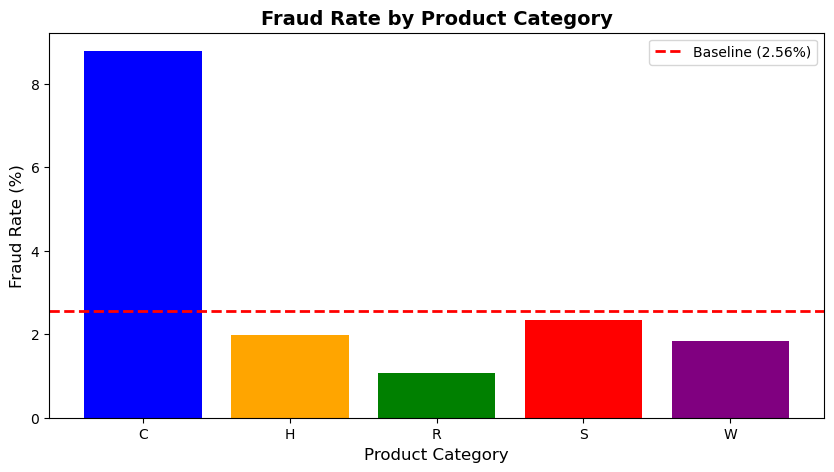

In [262]:
plt.figure(figsize=(10,5))
colors = ['blue', 'orange', 'green', 'red', 'purple']
labels = ['C', 'H', 'R', 'S', 'W']

plt.bar(labels, rate_by_product.values, color=colors)
plt.axhline(y=2.56, color='red', linestyle='--', linewidth=2, label='Baseline (2.56%)')
plt.title('Fraud Rate by Product Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category', fontsize=12) 
plt.ylabel('Fraud Rate (%)', fontsize=12)
plt.legend()
plt.show()

#### Average transaction amount by product

In [267]:
avg_amount_by_product = df_transaction.groupby('ProductCD')['TransactionAmt'].agg(['mean', 'median', 'count'])
avg_amount_by_product.columns = ['Mean_Amount', 'Median_Amount', 'Transaction_Count']
print(avg_amount_by_product.sort_values('Mean_Amount', ascending=False))

           Mean_Amount  Median_Amount  Transaction_Count
ProductCD                                               
R           187.867969        150.000              13724
W           152.594447         82.950              56878
H            71.536757         50.000              15521
S            58.191508         40.000               2526
C            49.286792         36.379              11351


In [270]:
# Check if Product C fraud spikes during high-risk hours
product_c_data = df_transaction[df_transaction['ProductCD'] == 'C']

# Fraud rate by hour for Product C only
fraud_by_hour_productC = product_c_data.groupby('hour')['isFraud'].mean() * 100

print("Product C fraud rate by hour:")
print(fraud_by_hour_productC.sort_values(ascending=False).head(10))

Product C fraud rate by hour:
hour
14    18.025751
8     15.254237
11    14.285714
12    12.500000
6     12.328767
10    11.111111
7     10.924370
5     10.714286
19    10.695187
18    10.582011
Name: isFraud, dtype: float64


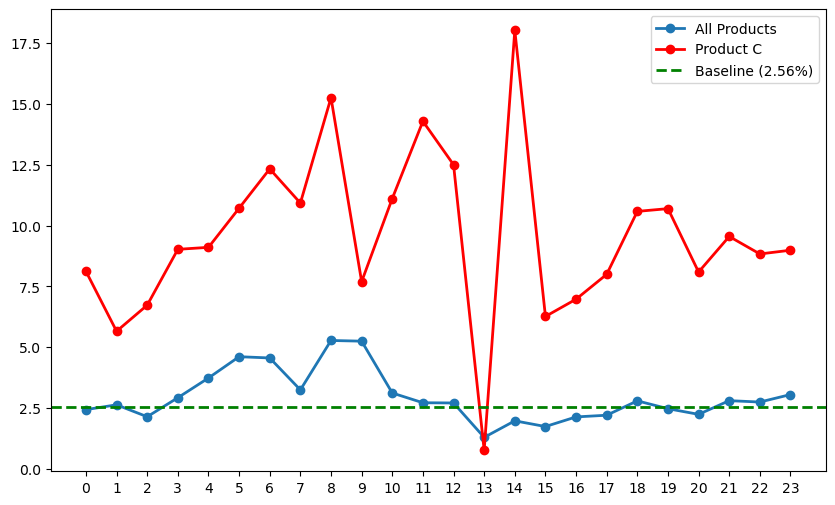

In [374]:
plt.figure(figsize=(10, 6))

# Plot the line
plt.plot(fraud_by_hour.index, fraud_by_hour.values, marker='o', linewidth=2, markersize=6, label='All Products')
plt.plot(fraud_by_hour_productC.index, fraud_by_hour_productC.values, marker='o', linewidth=2, markersize=6, color='red', label='Product C')
# Add horizontal line for baseline fraud rate
plt.axhline(y=2.56, color='green', linestyle='--', linewidth=2, label='Baseline (2.56%)')
plt.xticks(range(0, 24))
plt.legend()
plt.show()

In [275]:
# Count Product C transactions by hour
product_c_volume = product_c_data.groupby('hour').size()

print("Product C transaction volume by hour:")
print(product_c_volume.sort_values(ascending=False).head(10))

Product C transaction volume by hour:
hour
23    779
1     778
0     776
17    763
2     758
18    756
20    754
19    748
21    691
4     670
dtype: int64


In [276]:
# Create a comparison
product_c_analysis = pd.DataFrame({
    'Transaction_Count': product_c_data.groupby('hour').size(),
    'Fraud_Rate': product_c_data.groupby('hour')['isFraud'].mean() * 100
})

# Sort by fraud rate to see pattern
print(product_c_analysis.sort_values('Fraud_Rate', ascending=False).head(10))

      Transaction_Count  Fraud_Rate
hour                               
14                  233   18.025751
8                    59   15.254237
11                   42   14.285714
12                   72   12.500000
6                   219   12.328767
10                   18   11.111111
7                   119   10.924370
5                   532   10.714286
19                  748   10.695187
18                  756   10.582011


In [279]:
print(product_c_analysis.sort_values('Transaction_Count', ascending=False).head(10))

      Transaction_Count  Fraud_Rate
hour                               
23                  779    8.985879
1                   778    5.655527
0                   776    8.118557
17                  763    7.994758
2                   758    6.728232
18                  756   10.582011
20                  754    8.090186
19                  748   10.695187
21                  691    9.551375
4                   670    9.104478


### Fraud Rate By Email Domain Analysis

In [286]:
df_transaction['P_emaildomain'].unique()

array([nan, 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

In [288]:
df_transaction['P_emaildomain'].value_counts().head(10)

P_emaildomain
gmail.com        36290
yahoo.com        15883
anonymous.com     8663
hotmail.com       8119
aol.com           4866
comcast.net       1856
icloud.com         894
msn.com            852
outlook.com        767
att.net            694
Name: count, dtype: int64

In [291]:
df_transaction['P_emaildomain'].isna().sum()

np.int64(15393)

In [292]:
df_transaction['P_emaildomain'].value_counts().head(15).index

Index(['gmail.com', 'yahoo.com', 'anonymous.com', 'hotmail.com', 'aol.com',
       'comcast.net', 'icloud.com', 'msn.com', 'outlook.com', 'att.net',
       'sbcglobal.net', 'verizon.net', 'live.com', 'bellsouth.net', 'cox.net'],
      dtype='object', name='P_emaildomain')

#### Calculating Fraud Rate for the Top 15 Email Domain

In [294]:
p_email_counts = df_transaction['P_emaildomain'].value_counts().head(10)
p_email_missing = df_transaction['P_emaildomain'].isna().sum()

In [327]:
p_email_counts

P_emaildomain
gmail.com        36290
yahoo.com        15883
anonymous.com     8663
hotmail.com       8119
aol.com           4866
comcast.net       1856
icloud.com         894
msn.com            852
outlook.com        767
att.net            694
Name: count, dtype: int64

In [302]:
top_domains = df_transaction['P_emaildomain'].value_counts().head(10).index

In [303]:
df_top_domains = df_transaction[df_transaction['P_emaildomain'].isin(top_domains)]

In [310]:
df_top_domains.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,transaction_range,datetime,hour,day_of_week,is_weekend,hour_risk_score,day_risk_score,temporal_risk_score,temporal_risk_category,D7_is_missing
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,Low-value($0-$50:),2017-12-02 00:00:01,0,5,True,2.434864,2.356357,2.39561,medium,1
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,Medium-value($50-$100),2017-12-02 00:01:09,0,5,True,2.434864,2.356357,2.39561,medium,1
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,Low-value($0-$50:),2017-12-02 00:01:39,0,5,True,2.434864,2.356357,2.39561,medium,1
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,Low-value($0-$50:),2017-12-02 00:01:46,0,5,True,2.434864,2.356357,2.39561,medium,1
5,2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,...,Low-value($0-$50:),2017-12-02 00:01:50,0,5,True,2.434864,2.356357,2.39561,medium,1


In [304]:
fraud_by_email = df_top_domains.groupby('P_emaildomain')['isFraud'].agg(['mean', 'count'])

In [305]:
fraud_by_email.columns = ['Fraud_Rate', 'Count']

In [306]:
fraud_by_email['Fraud_Rate'] = fraud_by_email['Fraud_Rate'] * 100

In [307]:
fraud_by_email = fraud_by_email.sort_values('Fraud_Rate', ascending=False)

In [308]:
fraud_by_email 

,Fraud_Rate,Count
P_emaildomain,,
outlook.com,6.910039,767
hotmail.com,4.631112,8119
icloud.com,3.579418,894
gmail.com,3.521631,36290
msn.com,1.643192,852
aol.com,1.418002,4866
yahoo.com,1.347353,15883
anonymous.com,1.050444,8663
att.net,0.864553,694


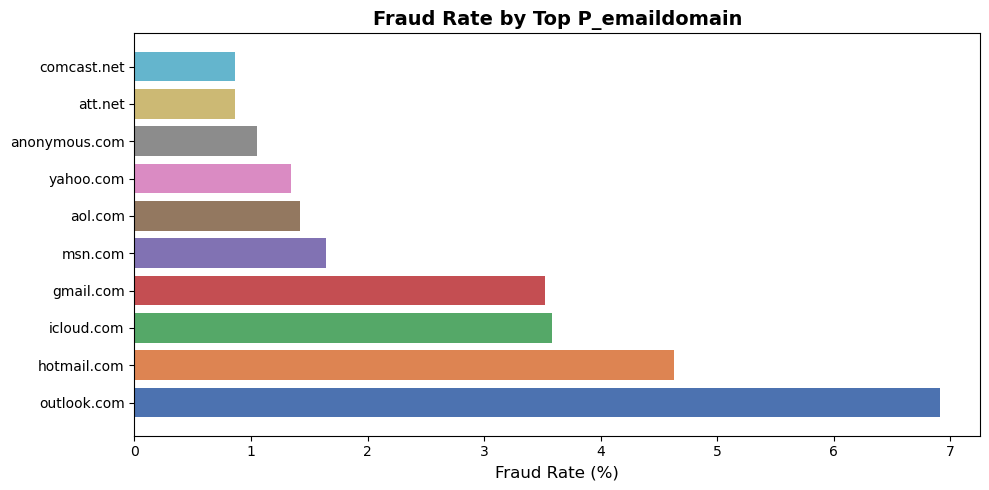

In [423]:
plt.figure(figsize=(10,5))
colors = sns.color_palette("deep", len(fraud_by_email.index))
plt.barh(fraud_by_email.index, fraud_by_email['Fraud_Rate'], color = colors)
plt.title('Fraud Rate by Top P_emaildomain', fontsize=14, fontweight='bold')
plt.xlabel('Fraud Rate (%)', fontsize=12)
plt.tight_layout()
plt.show()

In [325]:
missing_email_fraud = df_transaction[df_transaction['P_emaildomain'].isna()]['isFraud'].mean() * 100

In [326]:
missing_email_fraud

np.float64(2.312739556941467)

In [328]:
# Check R_emaildomain
r_email_counts = df_transaction['R_emaildomain'].value_counts().head(10)
r_email_missing = df_transaction['R_emaildomain'].isna().sum()

In [335]:
print(r_email_counts)
print(f"\nMissing Receiver Domain: {r_email_missing}")

R_emaildomain
gmail.com        13024
anonymous.com     6954
hotmail.com       5422
yahoo.com         3222
aol.com           1327
comcast.net        783
outlook.com        438
icloud.com         318
msn.com            308
yahoo.com.mx       291
Name: count, dtype: int64

Missing Receiver Domain: 65454


In [337]:
top_r_domains = df_transaction['R_emaildomain'].value_counts().head(10).index
df_top_r_domains = df_transaction[df_transaction['R_emaildomain'].isin(top_r_domains)]


In [342]:
top_r_domains_fraud = df_top_r_domains.groupby('R_emaildomain')['isFraud'].agg(['mean', 'count'])
top_r_domains_fraud.columns = ["fraud_rate", "count"]
top_r_domains_fraud['fraud_rate'] = top_r_domains_fraud['fraud_rate'] * 100
top_r_domains_fraud = top_r_domains_fraud.sort_values('fraud_rate', ascending=False)

In [343]:
top_r_domains_fraud

,fraud_rate,count
R_emaildomain,,
outlook.com,10.502283,438
gmail.com,6.349816,13024
hotmail.com,6.270749,5422
icloud.com,4.402516,318
yahoo.com,2.917443,3222
comcast.net,1.404853,783
anonymous.com,0.949094,6954
aol.com,0.904295,1327
yahoo.com.mx,0.687285,291


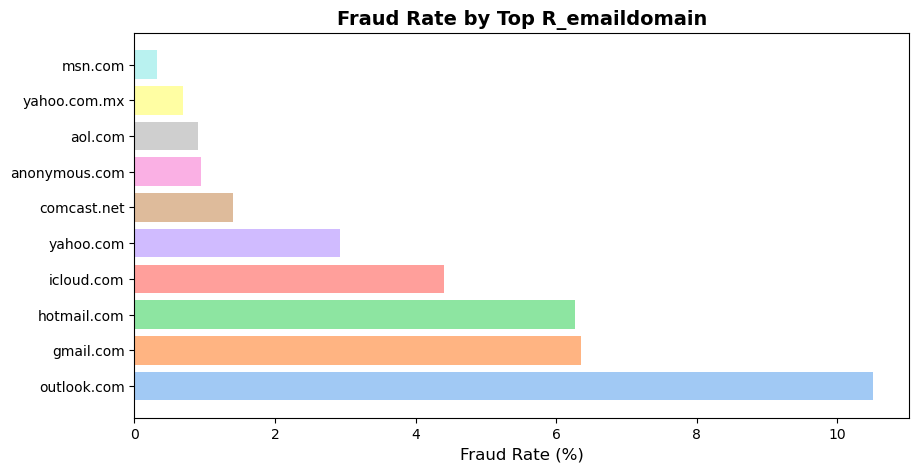

In [422]:
plt.figure(figsize=(10,5))
colors = sns.color_palette("pastel", len(top_r_domains_fraud.index))
plt.barh(top_r_domains_fraud.index, top_r_domains_fraud['fraud_rate'], color = colors)
plt.title('Fraud Rate by Top R_emaildomain', fontsize=14, fontweight='bold')
plt.xlabel('Fraud Rate (%)', fontsize=12)
plt.show()

In [344]:
r_email_missing_fraud = df_transaction[df_transaction['R_emaildomain'].isna()]['isFraud'].mean() * 100

In [345]:
r_email_missing_fraud

np.float64(1.7279310660922174)

In [346]:
# Check fraud rate when P and R email are DIFFERENT vs SAME
df_transaction['email_match'] = df_transaction['P_emaildomain'] == df_transaction['R_emaildomain']


In [347]:
df_transaction['email_match']

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998     True
99999    False
Name: email_match, Length: 100000, dtype: bool

In [362]:
df_transaction['email_match'].value_counts()

email_match
False    74868
True     25132
Name: count, dtype: int64

In [367]:
df_transaction.groupby('email_match')['isFraud'].value_counts(normalize=True)* 100

email_match  isFraud
False        0          98.315702
             1           1.684298
True         0          94.827312
             1           5.172688
Name: proportion, dtype: float64

In [357]:
email_match_fraud = df_transaction.groupby('email_match')['isFraud'].agg(['mean', 'count'])
email_match_fraud.columns = ['Fraud_Rate', 'Count']
email_match_fraud['Fraud_Rate'] = email_match_fraud['Fraud_Rate'] * 100
email_match_fraud = email_match_fraud.sort_values('Fraud_Rate', ascending=False)


In [358]:
email_match_fraud

,Fraud_Rate,Count
email_match,,
True,5.172688,25132
False,1.684298,74868


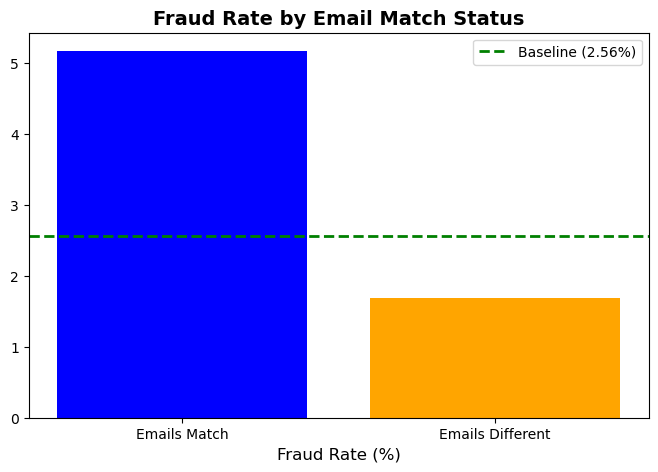

In [371]:
plt.figure(figsize=(8,5))
labels = ['Emails Match', 'Emails Different']
plt.bar(labels, email_match_fraud['Fraud_Rate'], color = ["blue", "orange"])
plt.axhline(y=2.56, color='green', linestyle='--', linewidth=2, label='Baseline (2.56%)')
plt.title('Fraud Rate by Email Match Status', fontsize=14, fontweight='bold')
plt.xlabel('Fraud Rate (%)', fontsize=12)
plt.legend()
plt.show()

## Card Information Analysis

In [391]:
card_df_transactions = df_transaction.loc[:, df_transaction.columns.str.startswith('card')]

In [392]:
card_df_transactions.columns.to_list()

['card1', 'card2', 'card3', 'card4', 'card5', 'card6']

In [393]:
card_df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   card1   100000 non-null  int64  
 1   card2   98646 non-null   float64
 2   card3   99997 non-null   float64
 3   card4   99993 non-null   object 
 4   card5   99475 non-null   float64
 5   card6   99996 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 4.6+ MB


In [396]:
len(df_transaction["card4"])

100000

In [397]:
len(df_transaction["card6"])

100000

In [403]:
df_transaction["card4"].isna().sum()

np.int64(7)

In [ ]:
df_transaction["card6"].isna().sum()

np.int64(4)

In [394]:
df_transaction['card4'].unique()

array(['discover', 'mastercard', 'visa', 'american express', nan],
      dtype=object)

In [395]:
df_transaction['card6'].unique()

array(['credit', 'debit', nan, 'debit or credit', 'charge card'],
      dtype=object)

In [401]:
df_transaction['card4'].value_counts()


card4
visa                65602
mastercard          29599
american express     3330
discover             1462
Name: count, dtype: int64

In [402]:
df_transaction['card6'].value_counts()

card6
debit              64923
credit             35063
debit or credit        7
charge card            3
Name: count, dtype: int64

In [400]:
# Check card4 values (card brands)
card4_values = df_transaction['card4'].value_counts()

# Check card6 values (card categories)
card6_values = df_transaction['card6'].value_counts()

In [410]:
df_transaction[df_transaction["card4"].isna()]["isFraud"].count()

np.int64(7)

In [ ]:
missing_card4_count = df_transaction[df_transaction["card4"].isna()]["isFraud"].sum()

np.int64(2)

In [407]:
missing_card4_fraud_rate = df_transaction[df_transaction["card4"].isna()]["isFraud"].mean() * 100

In [408]:
missing_card4_fraud_rate

np.float64(28.57142857142857)

In [412]:
# Fraud by card brand
fraud_by_card4 = df_transaction.groupby('card4')['isFraud'].agg(['mean', 'count'])
fraud_by_card4.columns = ['Fraud_Rate', 'Count']
fraud_by_card4['Fraud_Rate'] = fraud_by_card4['Fraud_Rate'] * 100
fraud_by_card4 = fraud_by_card4.sort_values('Fraud_Rate', ascending=False)


In [413]:
fraud_by_card4 

,Fraud_Rate,Count
card4,,
mastercard,2.881854,29599
discover,2.530780,1462
visa,2.486205,65602
american express,1.141141,3330


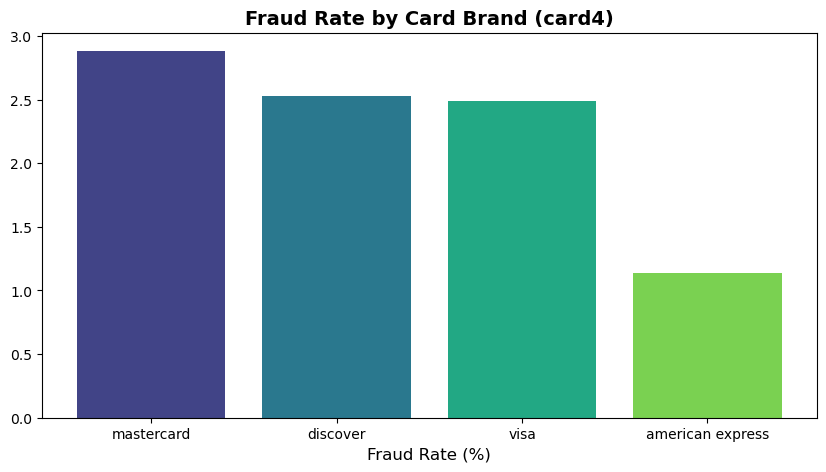

In [417]:
plt.figure(figsize=(10,5))
labels = fraud_by_card4.index.tolist()
colors = sns.color_palette("viridis", len(labels))
plt.bar(labels, fraud_by_card4['Fraud_Rate'], color=colors)
plt.title('Fraud Rate by Card Brand (card4)', fontsize=14, fontweight='bold')
plt.xlabel('Fraud Rate (%)', fontsize=12)
plt.show()

In [414]:
# Fraud by card type  
fraud_by_card6 = df_transaction.groupby('card6')['isFraud'].agg(['mean', 'count'])
fraud_by_card6.columns = ['Fraud_Rate', 'Count']
fraud_by_card6['Fraud_Rate'] = fraud_by_card6['Fraud_Rate'] * 100
fraud_by_card6 = fraud_by_card6.sort_values('Fraud_Rate', ascending=False)

In [415]:
fraud_by_card6

,Fraud_Rate,Count
card6,,
credit,3.599236,35063
debit,1.997751,64923
charge card,0.000000,3
debit or credit,0.000000,7


Text(0.5, 0, 'Fraud Rate (%)')

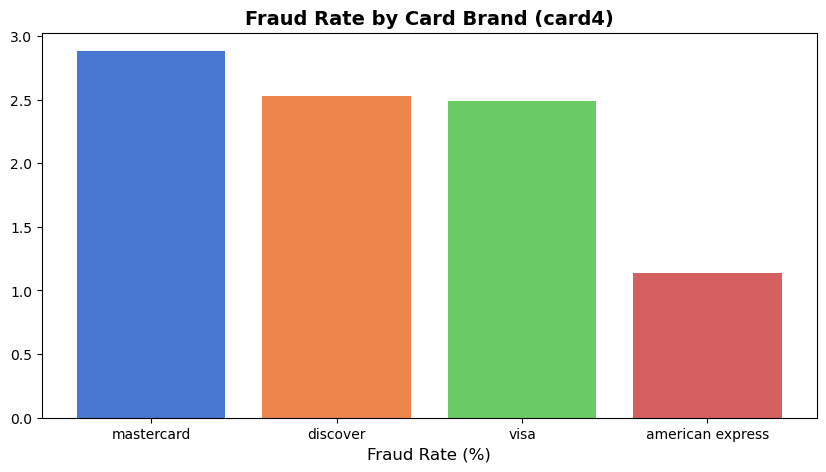

In [425]:
plt.figure(figsize=(10,5))
labels = fraud_by_card4.index.tolist()
colors = sns.color_palette("muted", len(labels))
plt.bar(labels, fraud_by_card4['Fraud_Rate'], color=colors)
plt.title('Fraud Rate by Card Brand (card4)', fontsize=14, fontweight='bold')
plt.xlabel('Fraud Rate (%)', fontsize=12)   



# Fraud Detection - Exploratory Data Analysis Summary

## 1. Dataset Overview

**Dataset:** IEEE-CIS Fraud Detection (Vesta Corporation)
- **Sample Size:** 100,000 transactions (from 590k total)
- **Time Period:** 6 months of e-commerce transactions
- **Target Variable:** isFraud (binary: 0 = legitimate, 1 = fraud)
- **Features:** 394 columns
- **Class Distribution:** 
  - Legitimate: 97,439 (97.44%)
  - Fraud: 2,561 (2.56%)
  - **Imbalance Ratio:** 1:38

**Key Implication:** Accuracy is a misleading metric. Must use Precision, Recall, F1-score, and ROC-AUC.

---

## 2. Transaction Amount Analysis

### Key Findings:
- **Average Transaction Amount:**
  - Normal transactions: $130.66
  - Fraudulent transactions: $133.76
  - *Amount alone is weak predictor*

### Fraud Rate by Amount Range:

| Amount Range | Fraud Rate | Insight |
|--------------|-----------|---------|
| $0-$50 | 2.37% | Below baseline |
| $50-$100 | 2.49% | Near baseline |
| **$100-$500** | **2.89%** | **HIGHEST - Fraudster sweet spot** |
| $500-$1000 | 2.29% | Below baseline |
| $1000+ | 1.50% | LOWEST - Safer range |

### Business Insight:
Fraudsters target the $100-500 range because:
- High enough to be profitable
- Low enough to avoid automatic flags
- Blends into normal purchase patterns

**Recommendation:** Apply extra scrutiny to $100-500 transactions, especially when combined with other risk factors.

---

## 3. Temporal Analysis

### 3.1 Hour of Day Patterns

**High-Risk Hours (4am-9am):**
- Peak fraud rate: 5.2% at hour 8-9 (2x baseline)
- Low transaction volume (fewer legitimate customers)
- Cardholders sleeping, fraud teams understaffed

**Low-Risk Hours (1pm-5pm):**
- Lowest fraud rate: 1.3% at hour 13 (half baseline)
- High transaction volume
- Cardholders alert, full team coverage

**Key Insight:** Inverse relationship between transaction volume and fraud rate

### 3.2 Day of Week Patterns

| Day | Fraud Rate | Insight |
|-----|-----------|---------|
| Monday | 2.94% | HIGHEST |
| Tuesday | 2.86% | High |
| Wednesday | 2.41% | Below baseline |
| **Thursday** | **2.32%** | **LOWEST** |
| Friday | 2.72% | Moderate |
| Saturday | 2.36% | Low |
| Sunday | 2.52% | Near baseline |

**Pattern:** Early week (Mon-Tue) riskiest; weekends safer despite higher volume

### 3.3 Combined Temporal Risk Score

Created 5-level risk categorization based on hour + day patterns:

| Category | Fraud Rate | Transaction Count | Strategy |
|----------|-----------|------------------|----------|
| Very High | 4.76% | 168 | Manual review + 2FA |
| High | 4.33% | 6,681 | 2FA required |
| Medium | 2.59% | 72,354 | Standard checks |
| Low | 1.93% | 18,945 | Light monitoring |
| Very Low | 1.30% | 1,852 | Fast-track approval |

---

## 4. Missing Data Assessment

**Overall:** 319 out of 394 columns have missing data

### Breakdown by Severity:

| Severity | Missing % | Column Count | Action Plan |
|----------|-----------|-------------|-------------|
| Low | <5% | 37 | Drop rows or simple imputation |
| Moderate | 5-60% | 109 | Create "is_missing" flags |
| Severe | >60% | 173 | Test predictiveness |

### Critical Discovery: Predictive Missingness

**Example - D7 Column (93.9% missing):**
- D7 missing: 2.03% fraud rate (SAFE)
- D7 present: 10.77% fraud rate (5x HIGHER!)

**Insight:** Missing values themselves can be predictive signals. Instead of dropping, create "is_missing" binary features.

---

## 5. Product Type Analysis

### Fraud Rate by Product:

| Product | Avg Amount | Fraud Rate | Transaction Count | Risk Level |
|---------|-----------|-----------|------------------|-----------|
| **C** | **$49** | **8.78%** | **11,351** | **CRITICAL** |
| S | $58 | 2.34% | 2,526 | Low |
| H | $72 | 1.98% | 15,521 | Low |
| W | $153 | 1.85% | 56,878 | Low |
| R | $188 | 1.08% | 13,724 | Very Low |

### Product C Deep Dive:

**Characteristics:**
- Lowest average transaction amount ($49)
- Highest fraud rate (8.78% - 3.4x baseline)
- Nighttime product (peak volume 11pm-1am)

**Fraud Timing Anomaly:**
- Overall pattern: Fraud peaks 4am-9am
- Product C pattern: Fraud peaks 10am-2pm (18% fraud rate at 2pm!)
- Low-volume daytime hours = highest fraud

**Theory:** 
- Likely digital goods/gift cards (easy to monetize)
- Legitimate customers shop at night
- Fraudsters operate during day (their "work hours")
- Small amounts bypass automatic fraud thresholds

---

## 6. Email Domain Analysis

### 6.1 Purchaser Email (P_emaildomain)

**Riskiest Domains:**
| Domain | Fraud Rate | Count | Type |
|--------|-----------|-------|------|
| **outlook.com** | **6.91%** | 767 | Free email |
| **hotmail.com** | **4.63%** | 8,119 | Free email |
| icloud.com | 3.58% | 8,894 | Apple |
| gmail.com | 3.52% | 36,290 | Free email |

**Safest Domains:**
| Domain | Fraud Rate | Count | Type |
|--------|-----------|-------|------|
| att.net | 0.86% | 3,694 | ISP |
| comcast.net | 0.86% | 1,856 | ISP |

**Insight:** ISP emails 8x safer than Outlook (require paid subscription, harder to fake)

### 6.2 Email Match Analysis

**Critical Finding:**

| Pattern | Fraud Rate | Count | Insight |
|---------|-----------|-------|---------|
| **P = R (same email)** | **5.17%** | 25,132 | **High risk** |
| P ≠ R (different emails) | 1.69% | 74,868 | Low risk (gifts) |

**Explanation:** 
- P ≠ R is normal for gift purchases (75% of transactions)
- P = R is unusual in gift-heavy dataset → indicates possible fraud

---

## 7. Card Information Analysis

### 7.1 Card Type (card6)

| Type | Fraud Rate | Count | Risk Multiplier |
|------|-----------|-------|----------------|
| **Credit** | **3.60%** | 35,063 | **1.8x baseline** |
| Debit | 2.00% | 64,923 | Below baseline |

**Why Credit Riskier:**
- No immediate balance check
- Higher credit limits
- Easier to use for online fraud
- Delayed detection

### 7.2 Card Brand (card4)

| Brand | Fraud Rate | Count | Insight |
|-------|-----------|-------|---------|
| **Mastercard** | **2.88%** | 29,599 | Highest risk |
| Discover | 2.53% | 1,462 | Above baseline |
| Visa | 2.49% | 65,602 | Near baseline |
| **American Express** | **1.14%** | 3,330 | **SAFEST** |

**American Express Anomaly:**
- Lowest fraud despite low volume (breaks meta-pattern)
- Premium card = stricter approval, wealthier customers
- Better fraud detection systems
- Harder for fraudsters to obtain

---

## 8. Meta-Pattern Discovery

### Universal Pattern: "Low Volume/Unusual Behavior = High Fraud"

This pattern held across multiple features:

| Feature | Low Volume Example | High Volume Example |
|---------|-------------------|-------------------|
| **Hour** | 4am-9am: 5.2% fraud | 1pm-5pm: 1.3% fraud |
| **Product C Hour** | 2pm: 18% fraud | 11pm: 9% fraud |
| **Amount** | $100-500: 2.89% fraud | $1000+: 1.50% fraud |
| **Email Match** | P=R: 5.17% fraud | P≠R: 1.69% fraud |

**Exception:** American Express (low volume + premium security = low fraud)

**Insight:** Fraudsters struggle when:
- High transaction volumes make detection easier
- Normal customer patterns are well-established
- Unusual behavior triggers alerts

---

## 9. Compound Risk Factors

### High-Risk Transaction Profile:

**Maximum Risk Scenario:**
- Product C purchase
- Amount: $100-500
- Time: 2pm on Monday
- Email: outlook.com with P = R
- Card: Mastercard credit card

**Estimated Combined Risk:** 15-20% fraud probability

### Low-Risk Transaction Profile:

**Minimum Risk Scenario:**
- Product R purchase
- Amount: $1000+
- Time: 3pm on Thursday
- Email: ISP domain (att.net) with P ≠ R
- Card: American Express debit

**Estimated Combined Risk:** <0.5% fraud probability

---

## 10. Business Recommendations

### Risk-Based Authentication Strategy:

#### Very High Risk (>4% fraud rate):
- **Triggers:** Product C + early morning + Outlook email + credit card
- **Action:** Manual review + 2FA + additional verification
- **Volume:** ~168 transactions (manageable)

#### High Risk (3-4% fraud rate):
- **Triggers:** Credit card + early morning OR Product C + medium amount
- **Action:** Automated 2FA required
- **Volume:** ~6,681 transactions

#### Medium Risk (2-3% fraud rate):
- **Triggers:** Standard transactions near baseline
- **Action:** Standard automated fraud checks
- **Volume:** ~72,354 transactions (majority)

#### Low Risk (<2% fraud rate):
- **Triggers:** ISP email + debit + afternoon + Product R
- **Action:** Streamlined approval, minimal friction
- **Volume:** ~20,797 transactions

### Product-Specific Rules:

**Product C (High Risk):**
- Extra scrutiny during 10am-2pm window
- Lower approval thresholds
- Require additional verification for first-time buyers

**Products R, W, H (Low Risk):**
- Standard processing
- Focus resources elsewhere

---

## 11. Key Takeaways for Model Building

### Feature Engineering Priorities:

1. **Temporal features:**
   - Hour risk score
   - Day risk score  
   - Combined temporal risk category
   - Is_weekend flag

2. **Missing data features:**
   - Create "is_missing" flags for D columns
   - Test other high-missing columns for predictiveness

3. **Interaction features:**
   - Product × Hour (especially Product C × daytime)
   - Amount × Hour (small amounts at risky times)
   - Email match × Product (P=R with Product C)
   - Card type × Amount

4. **Email features:**
   - Email domain risk score
   - P = R match flag
   - Free email vs ISP flag

5. **Product features:**
   - Product risk score
   - Product-specific hour patterns

### Model Evaluation Strategy:

**Do NOT use accuracy** (would get 97.44% by predicting all transactions as legitimate!)

**Use instead:**
- **Precision:** Of flagged frauds, how many are actually fraud?
- **Recall:** Of actual frauds, how many did we catch?
- **F1-Score:** Balance between precision and recall
- **ROC-AUC:** Overall model discrimination ability
- **Business metrics:** Cost of missed fraud vs false alarms

### Class Imbalance Handling:

Must address 1:38 imbalance ratio:
- SMOTE (Synthetic Minority Over-sampling)
- Random undersampling of majority class
- Class weights in model training
- Ensemble methods
- Threshold optimization for business objectives

---

## 12. Conclusion

This EDA revealed that **fraud is not random** - it follows clear, exploitable patterns:

✅ **Temporal patterns:** Fraudsters operate during low-vigilance hours
✅ **Product patterns:** Certain products (C) are targeted heavily  
✅ **Amount patterns:** Medium-value transactions are sweet spot
✅ **Email patterns:** Free, easy-to-create emails are preferred
✅ **Card patterns:** Credit cards more vulnerable than debit

**Most importantly:** Multiple risk factors compound. A single red flag might be acceptable, but combinations dramatically increase fraud probability.

**Next Steps:** Build features based on these insights and train models to predict fraud in real-time, with business-appropriate thresholds balancing fraud prevention and customer experience.

---

*Analysis conducted on 100,000 transaction sample*
*Date: [25/10/2025]*